In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mail=pd.read_csv(r"E:\Flip robo Internship\Assignments\projects\Project_2\messages.csv")
mail

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
mail.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
mail['subject'].fillna("No Subject",inplace=True)

In [8]:
mail.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [4]:
mail.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

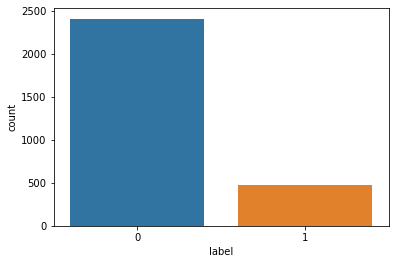

In [9]:
sns.countplot(x='label',data=mail)
plt.show()

In [11]:
#Adding new column for Length of message and subject
mail['Subject length'] = mail.subject.str.len()
mail['Message length'] = mail.message.str.len()
mail.head(2)

,subject,message,label,Subject length,Message length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
1,No Subject,"lang classification grimes , joseph e . and ba...",0,10,1800


In [12]:

mail['message'] = mail['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
mail['subject'] = mail['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')


mail['message'] = mail['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
mail['subject'] = mail['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


mail['message'] = mail['message'].str.replace(r'£|\$', 'dollers')
mail['subject'] = mail['subject'].str.replace(r'£|\$', 'dollers')
    
mail['message'] = mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
mail['subject'] = mail['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')


mail['message'] = mail['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
mail['subject'] = mail['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
mail.head(2)

,subject,message,label,Subject length,Message length
0,job posting - apple-iss research center,content - length : numbr apple-iss research ce...,0,39,2856
1,No Subject,"lang classification grimes , joseph e . and ba...",0,10,1800


In [14]:
#Converting strings to lowercase
mail['message'] = mail['message'].str.lower()
mail['subject'] = mail['subject'].str.lower()

# Remove punctuation
mail['message'] = mail['message'].str.replace(r'[^\w\d\s]', ' ')
mail['subject'] = mail['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
mail['message'] = mail['message'].str.replace(r'\s+', ' ')
mail['subject'] = mail['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
mail['message'] = mail['message'].str.replace(r'^\s+|\s+?$', '')
mail['subject'] = mail['subject'].str.replace(r'^\s+|\s+?$', '')

In [15]:
mail.head()

,subject,message,label,Subject length,Message length
0,job posting apple iss research center,content length numbr apple iss research center...,0,39,2856
1,no subject,lang classification grimes joseph e and barbar...,0,10,1800
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046


In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
mail['message'] = mail['message'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail['subject'] = mail['subject'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail.head()

,subject,message,label,Subject length,Message length
0,"[job, posting, apple, iss, research, center]","[content, length, numbr, apple, iss, research,...",0,39,2856
1,"[no, subject]","[lang, classification, grimes, joseph, e, and,...",0,10,1800
2,"[query, letter, frequencies, for, text, identi...","[i, am, posting, this, inquiry, for, sergei, a...",0,50,1435
3,[risk],"[a, colleague, and, i, are, researching, the, ...",0,4,324
4,"[request, book, information]","[earlier, this, morning, i, was, on, the, phon...",0,24,1046


In [17]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))
mail['message'] = mail['message'].apply(lambda x:[term for term in x if term not in stop_words])
mail['subject'] = mail['subject'].apply(lambda x:[term for term in x if term not in stop_words])

In [18]:
#Stemming to get root words
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()
mail['message'] = mail['message'].apply(lambda x:' '.join(porter_stemmer.stem(y) for y in x))
mail['subject'] = mail['subject'].apply(lambda x:' '.join(porter_stemmer.stem(y) for y in x))

In [19]:
#Adding new column for Length of  clean message and subject
mail['clean_Subject length'] = mail.subject.str.len()
mail['clean_Message length'] = mail.message.str.len()
mail.head()

,subject,message,label,Subject length,Message length,clean_Subject length,clean_Message length
0,job post appl iss research center,content length numbr appl iss research center ...,0,39,2856,33,1822
1,subject,lang classif grime joseph e barbara f grime et...,0,10,1800,7,1289
2,queri letter frequenc text identif,post inquiri sergei atama satama umabnet ab um...,0,50,1435,34,957
3,risk,colleagu research differ degre risk perceiv ho...,0,4,324,4,183
4,request book inform,earlier morn phone friend mine live south amer...,0,24,1046,19,562


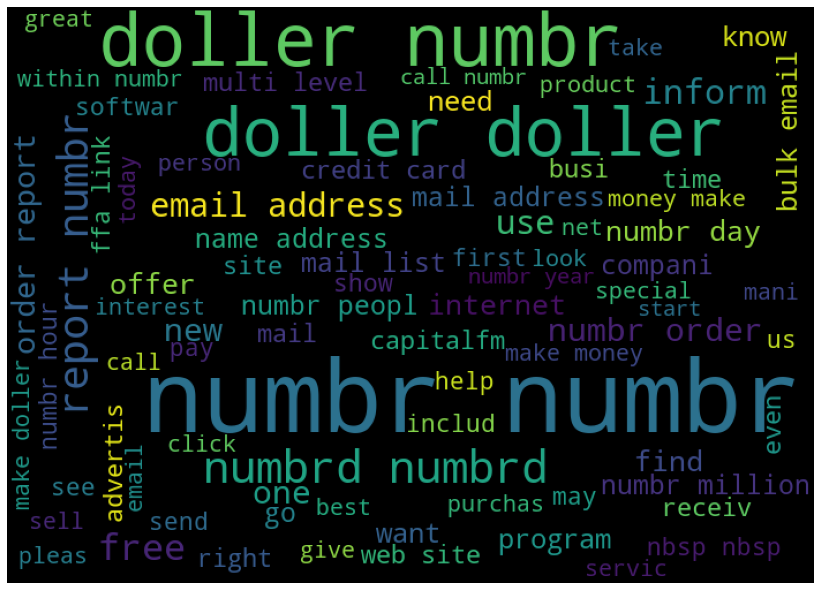

In [20]:
#Getting sense of loud words for spam mails in message
from wordcloud import WordCloud


spam = mail['message'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

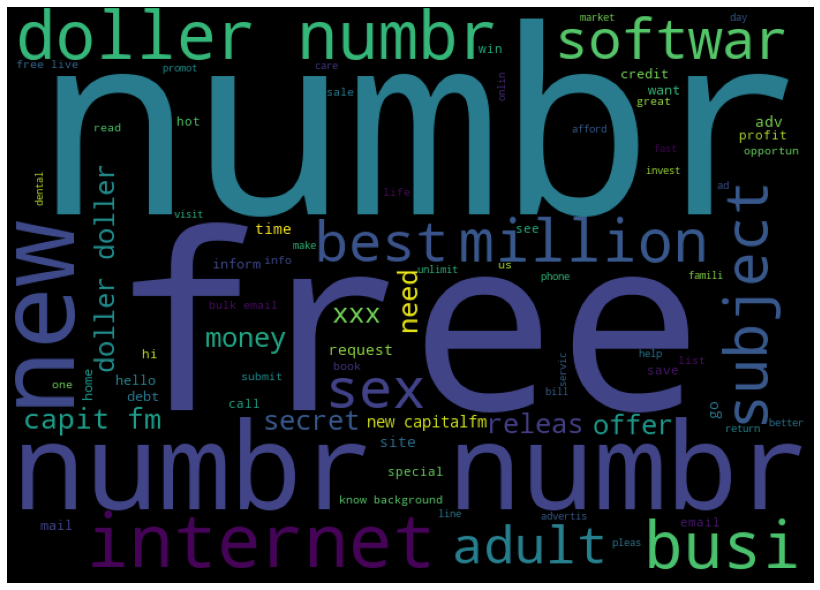

In [22]:
#Getting sense of loud words for spam mails in subject
from wordcloud import WordCloud


spam = mail['subject'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
#Converting text into vectors using TF-IDF
#Spliting of features and labels
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
df_x=mail.iloc[:,0:2]
features = tf_vec.fit_transform(mail['subject'] + mail['message'])

X = features
y = mail['label']
X.shape

(2893, 45828)

In [32]:
# Train and test splitting
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

**Using Multinomial Naive Bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred)*100)

Accuracy = >  82.32044198895028


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       585
           1       1.00      0.08      0.15       139

    accuracy                           0.82       724
   macro avg       0.91      0.54      0.52       724
weighted avg       0.85      0.82      0.76       724



In [35]:
#confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[585,   0],
       [128,  11]], dtype=int64)

**Using Support Vector Machines**

In [36]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
y_pred_sgd= sgd.predict(x_test)

print ('Accuracy = > ', accuracy_score(y_test,y_pred_sgd)*100)

Accuracy = >  99.17127071823204


In [37]:
#confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_sgd)
conf_mat

array([[584,   1],
       [  5, 134]], dtype=int64)

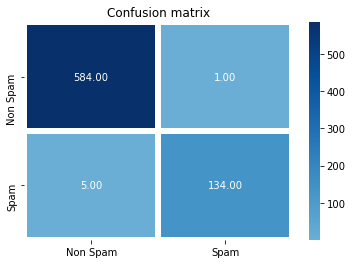

In [48]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_sgd)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='white',center=0,cmap=plt.cm.Blues,fmt='.2f')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Non Spam','Spam'])
ax.yaxis.set_ticklabels(['Non Spam','Spam'])
plt.show()